# Data Overview

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


---



Attribute Information:




1.   ID number
2.   Diagnosis (M = malignant, B = benign)





 Ten real-valued features are computed for each cell nucleus:

---



* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

In [165]:
# 1) Import the libraries that we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [166]:
df = pd.read_csv("data.csv")

In [167]:
#1
df.shape

(569, 33)

In [168]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [169]:
#4
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [170]:
#5
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

diagnosis is a categorical variable. all other variables are continuous.

In [171]:
#4
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Visualize continuous numeric variables

In [172]:
#1
other_variables = ['diagnosis']
continuous_variables = [x for x in df.columns if x not in other_variables]
print(continuous_variables)
continuous_data_df = df[continuous_variables]

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [173]:
# 2
continuous_data_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


There are 3 things that took my attention:

1) There is an id that cannot be used for classificaiton

2) Diagnosis is our class label

3) Unnamed: 32 feature includes NaN so we do not need it.

Therefore, drop these unnecessary features

In [174]:
y = df.diagnosis                          # M or B 
L = ['Unnamed: 32','id','diagnosis']

x = df.drop(L,axis = 1 )
x.head(6)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [175]:
#4
#sns.pairplot(continuous_data_df)

Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

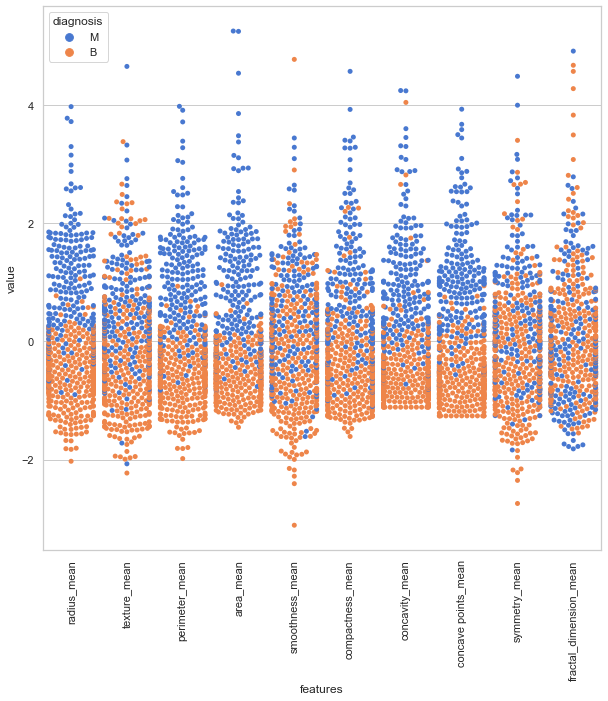

In [176]:
# first ten features
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

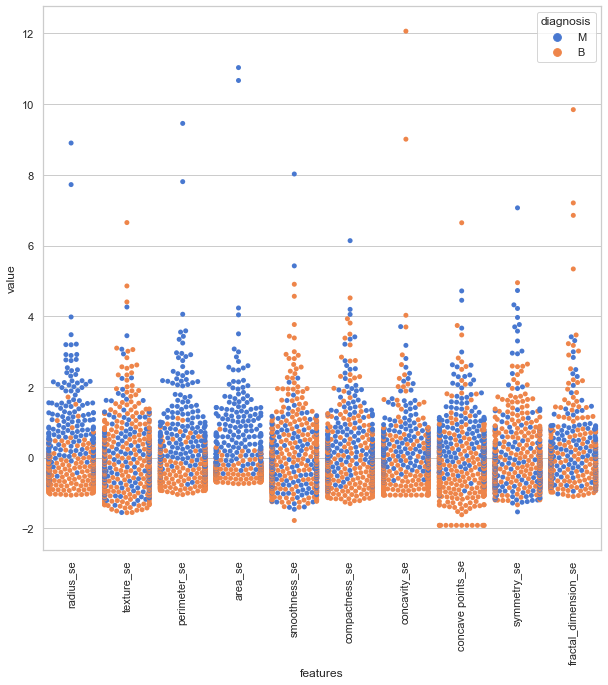

In [177]:
#second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  11.613393068313599  s


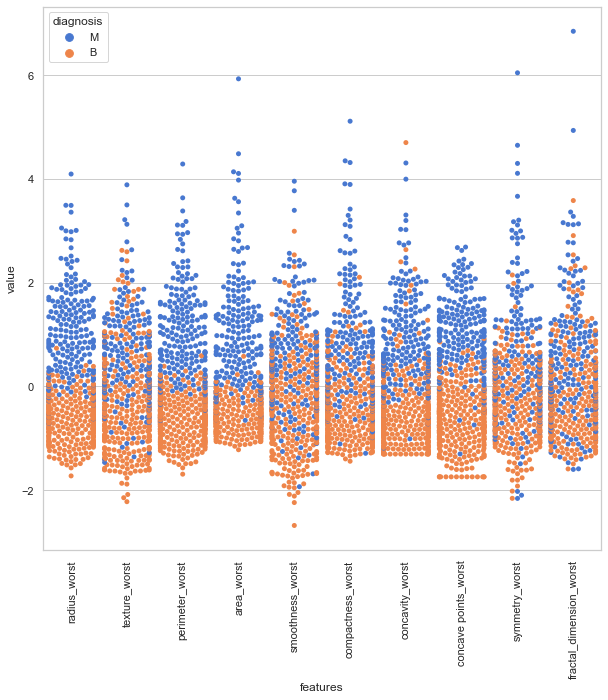

In [178]:
# third ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

# Feature Selection

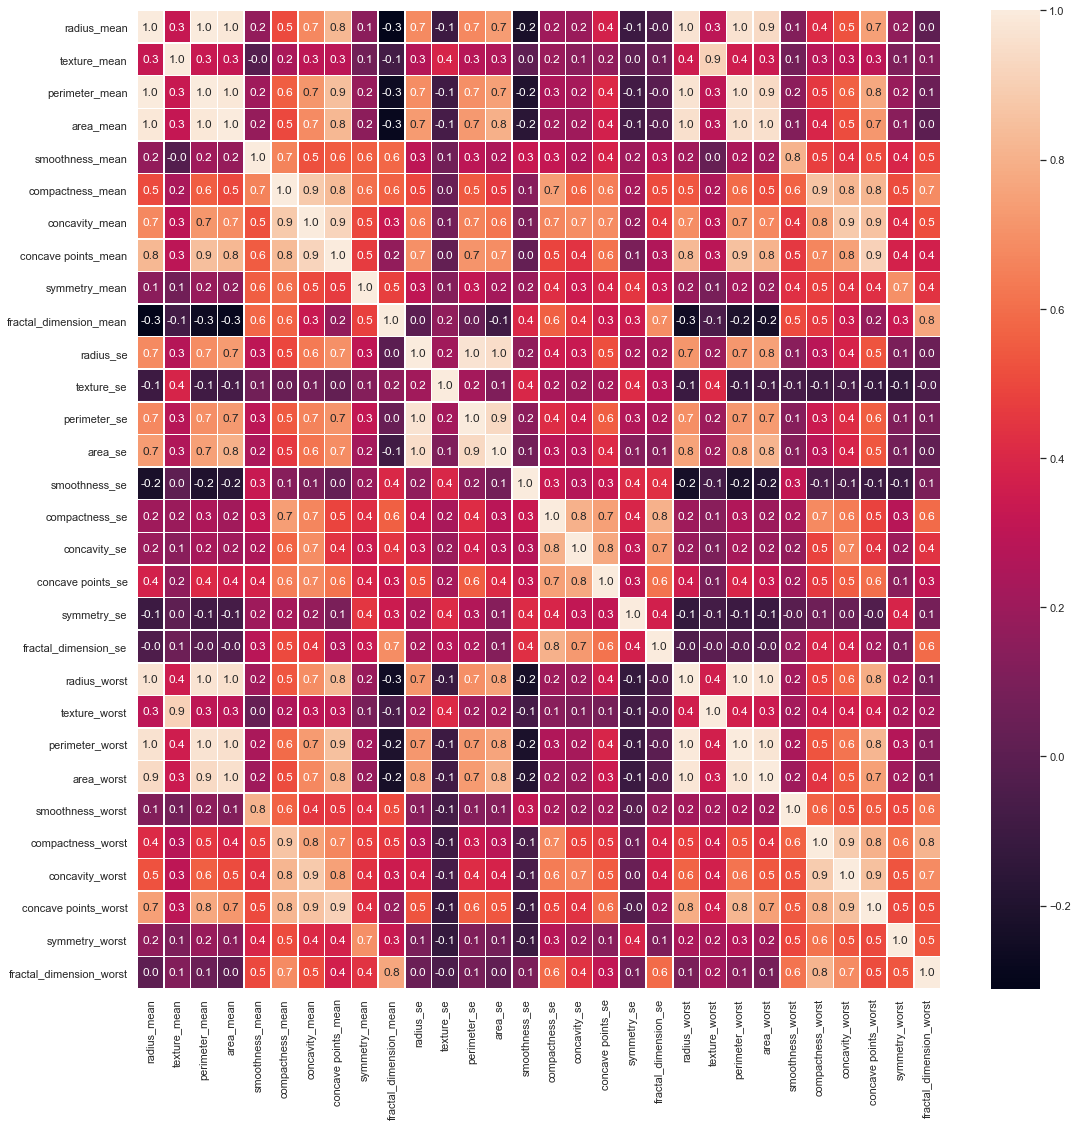

In [179]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

As it can be seen in map heat figure:

-**radius_mean**, **perimeter_mean** and **area_mean** are correlated with each other so we will use only area_mean because area_mean looks like clear in swarm plots.

-**Compactness_mean**,** concavity_mean** and **concave points_mean** are correlated with each other.Therefore we will  only choose concavity_mean.

-**radius_se**, **perimeter_se** and **area_se** are correlated and we will only use area_se. 

-**radius_worst**, **perimeter_worst** and **area_worst** are correlated so we will use area_worst.

-**Compactness_worst**, **concavity_worst** and **concave points_worst** so we will use concavity_worst.

-**Compactness_se**, **concavity_se** and **concave points_se** so we will use concavity_se. 

-**texture_mean** and **texture_worst** are correlated and we will use texture_mean. 

-**area_worst** and **area_mean** are correlated,we will use area_mean.


In [180]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [181]:
x_1.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [182]:
#1
categorical_variables_df = df[other_variables]
for each_var in categorical_variables_df.columns:
    print('{}_value \t count \n {} '.format(each_var,(categorical_variables_df[each_var].value_counts())))


diagnosis_value 	 count 
 B    357
M    212
Name: diagnosis, dtype: int64 


In [183]:
#1
for each_var in categorical_variables_df.columns:
    print('{}_column unique values  {} '.format(each_var,(categorical_variables_df[each_var].nunique())))

diagnosis_column unique values  2 


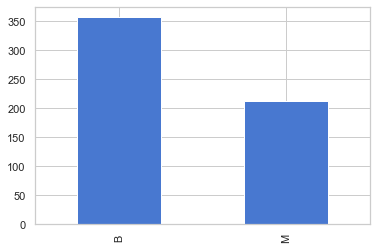

In [184]:
#3
categorical_variables_df['diagnosis'].value_counts().plot.bar()

# Feature Engineering

In [185]:
for x in x_1.columns:
    print(x_1[x].value_counts())


14.93    3
15.70    3
18.90    3
16.84    3
17.46    3
        ..
20.53    1
17.66    1
24.80    1
20.56    1
10.94    1
Name: texture_mean, Length: 479, dtype: int64
512.2     3
1214.0    2
399.8     2
758.6     2
1075.0    2
         ..
704.4     1
904.6     1
646.1     1
300.2     1
1001.0    1
Name: area_mean, Length: 539, dtype: int64
0.10070    5
0.10750    4
0.10540    4
0.11500    4
0.10890    3
          ..
0.07274    1
0.07948    1
0.07840    1
0.09780    1
0.07557    1
Name: smoothness_mean, Length: 474, dtype: int64
0.00000    13
0.12040     3
0.01342     2
0.03344     2
0.02688     2
           ..
0.12010     1
0.13480     1
0.05940     1
0.01797     1
0.06593     1
Name: concavity_mean, Length: 537, dtype: int64
0.1714    4
0.1769    4
0.1893    4
0.1717    4
0.1601    4
         ..
0.2079    1
0.1671    1
0.2127    1
0.1633    1
0.1382    1
Name: symmetry_mean, Length: 432, dtype: int64
0.05667    3
0.06113    3
0.05913    3
0.06782    3
0.05907    3
          ..
0.08980

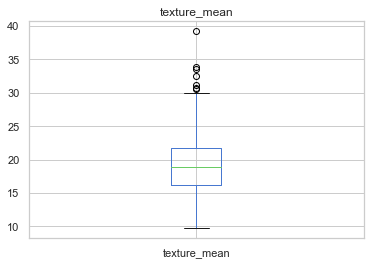

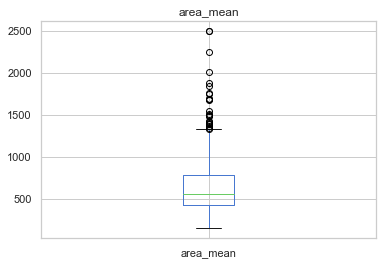

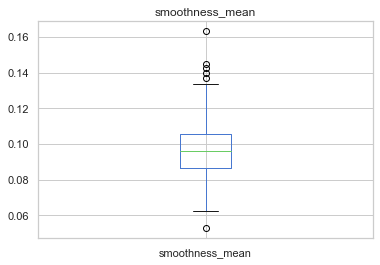

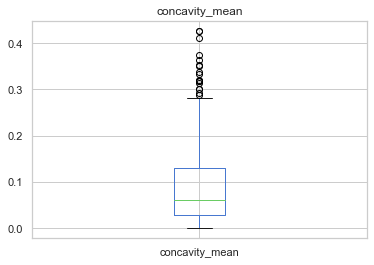

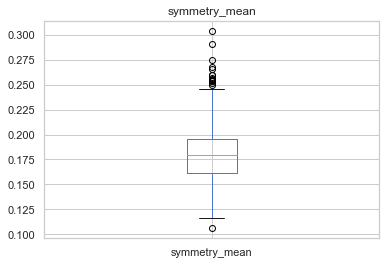

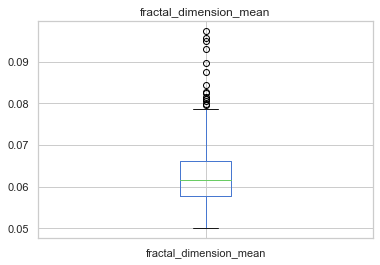

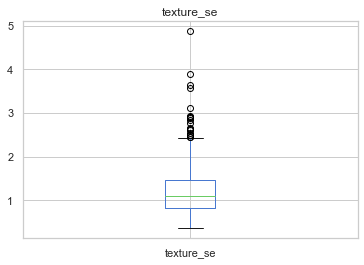

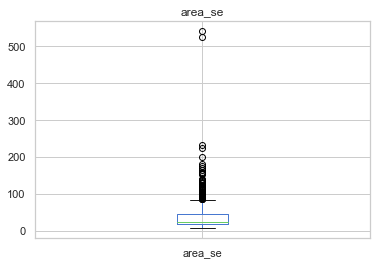

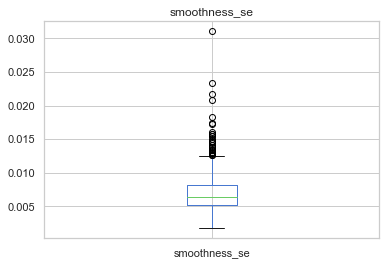

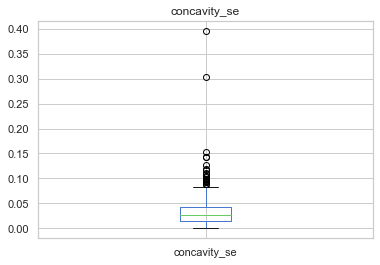

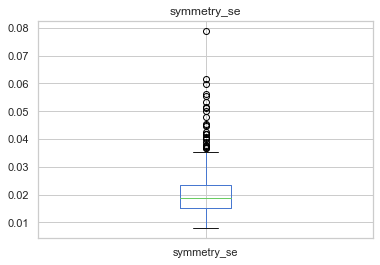

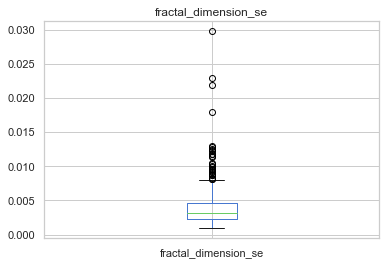

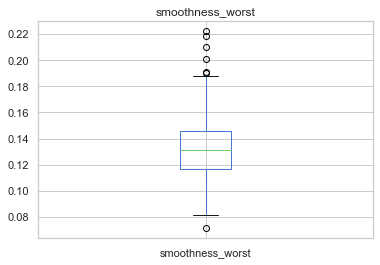

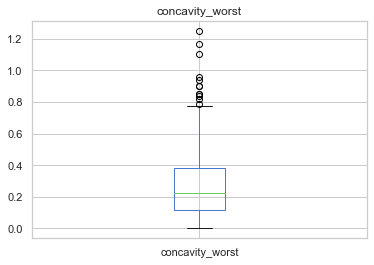

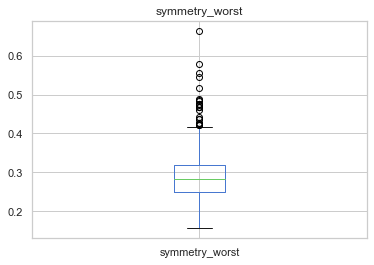

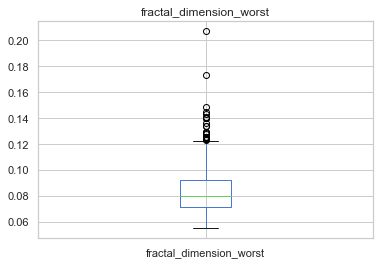

In [186]:
for x in x_1.columns:
    x_1[x].plot.box()
    
    plt.title(x)
    plt.show()

In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:

If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetr

In [189]:
for col in x_1.columns:
    
    print("Skewness before log normalisation is ",x_1[col].skew(skipna=True))
    x_1[col] = np.log(x_1[col].map(lambda x: x+1e-6 if x == 0 else x))
    if (x_1[col].skew() != np.nan): 
        print("Skewness after log normalisation is ",x_1[col].skew(skipna=True))

Skewness before log normalisation is  0.6504495420828159
Skewness after log normalisation is  -0.013874594745780218
Skewness before log normalisation is  1.6457321756240424
Skewness after log normalisation is  0.2849574596767259
Skewness before log normalisation is  0.45632376481956155
Skewness after log normalisation is  -0.06781634015731167
Skewness before log normalisation is  1.4011797389486722
Skewness after log normalisation is  -3.8175164750879977
Skewness before log normalisation is  0.7256089733642002
Skewness after log normalisation is  0.1657012621042947
Skewness before log normalisation is  1.3044888125755076
Skewness after log normalisation is  0.8535728395886225
Skewness before log normalisation is  1.646443808753053
Skewness after log normalisation is  0.0291905333277468
Skewness before log normalisation is  5.447186284898394
Skewness after log normalisation is  0.7976094380828641
Skewness before log normalisation is  2.314450056636761
Skewness after log normalisation is

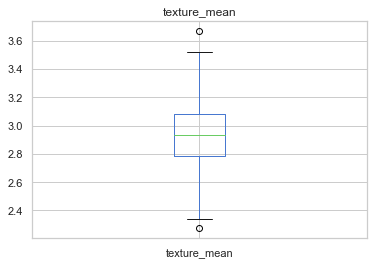

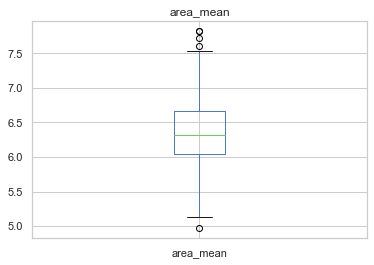

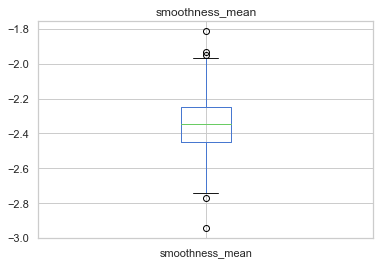

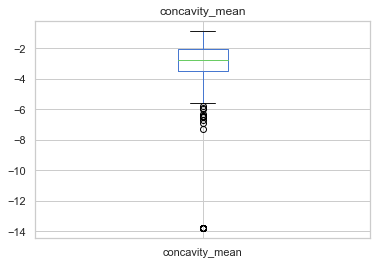

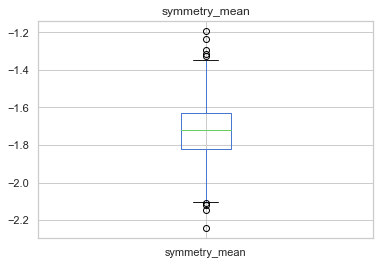

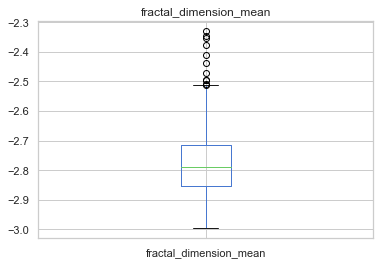

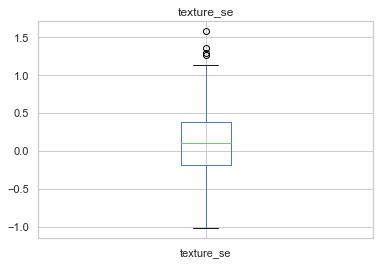

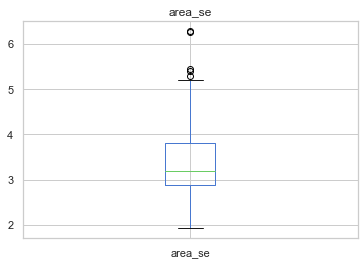

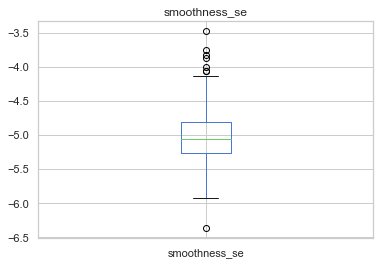

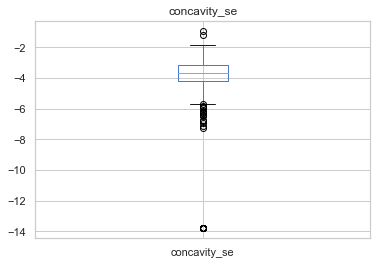

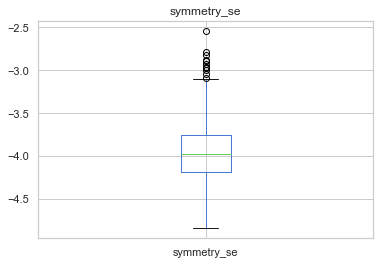

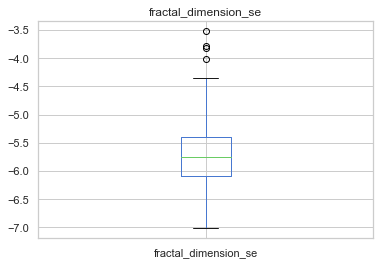

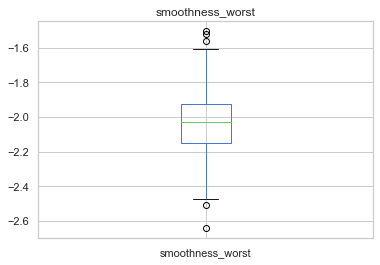

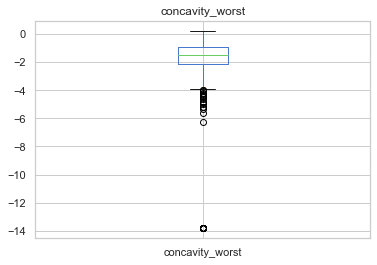

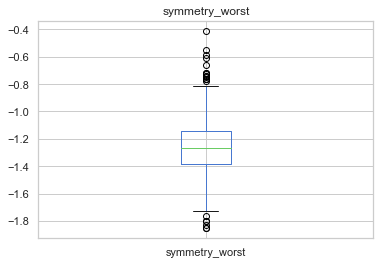

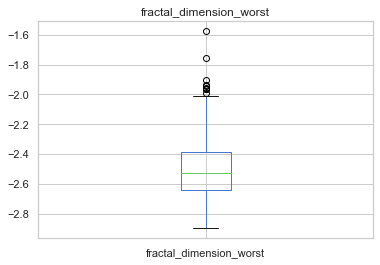

In [190]:
for x in x_1.columns:
    x_1[x].plot.box()
    plt.title(x)
    plt.show()

# Model selection


In [191]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [192]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler , LabelEncoder

#Econding target attribute diagnosis
le = LabelEncoder()
X = x_1
y = le.fit(df.diagnosis).transform(df.diagnosis)

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


'X' shape: (569, 16)
'y' shape: (569,)


In [193]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## SVM

### SVM Linear Kernel

In [194]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 96.98%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.968379    0.972414  0.969849    0.970397      0.969890
recall       0.983936    0.946309  0.969849    0.965122      0.969849
f1-score     0.976096    0.959184  0.969849    0.967640      0.969764
support    249.000000  149.000000  0.969849  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[245   4]
 [  8 141]]

Test Result:
Accuracy Score: 98.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.981651   0.983871  0.982456    0.982761      0.982469
recall       0.990741   0.968254  0.982456    0.979497      0.982456
f1-score     0.986175   0.976000  0.982456    0.981088      0.982426
support    108.000000  63.000000  0.982456  171.000000    171.00000

### SVM : Choosing Best Hyperparameters

### Data preparation

In [195]:
X_train = pipeline.fit_transform(X_train) #applying minmax and stardard scaling
X_test = pipeline.transform(X_test)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A44F73B250>,
      dtype=object)

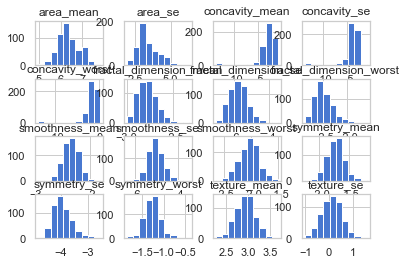

In [196]:
X_train.hist()

### Hyperparameters Tuning : Grid Search 

In [197]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=10, iid=True)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 98.49%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.980237    0.993103  0.984925    0.986670      0.985054
recall       0.995984    0.966443  0.984925    0.981213      0.984925
f1-score     0.988048    0.979592  0.984925    0.983820      0.984882
support    249.000000  149.000000  0.984925  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[248   1]
 [  5 144]]

Test Result:
Accuracy Score: 98.83%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.990741   0.984127  0.988304    0.987434      0.988304
recall       0.990741   0.984127  0.988304    0.987434      0.988304
f1-score     0.990741   0.984127  0.988304    0.987434      0.988304
support    1

[Parallel(n_jobs=1)]: Done 1260 out of 1260 | elapsed:    5.6s finished
C:\Users\h4mdi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


### Recursive feature elimination with cross validation and random forest classification

In [202]:
from sklearn.feature_selection import RFECV

#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)# The "accuracy" scoring is proportional to the number of correct classifications

clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=2, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'smoothness_se', 'concavity_se',
       'symmetry_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [210]:
best_features = list(X.columns[rfecv.support_])

In [205]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rfc = RandomForestClassifier() 


grid = GridSearchCV(rfc , param_grid, refit=True, verbose=1, cv=2, iid=True)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

rfc = RandomForestClassifier(**best_params)


Fitting 2 folds for each of 288 candidates, totalling 576 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best params: {'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed:  4.2min finished
C:\Users\h4mdi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [212]:
X = x_1[best_features]

In [214]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)# The "accuracy" scoring is proportional to the number of correct classifications

rfc.fit(x_train, y_train)
print_score(rfc, x_train, y_train, X_test, y_test, train=True)
print_score(rfc, x_train, y_train, x_test, y_test, train=False)



Train Result:
Accuracy Score: 98.74%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.988000    0.986486  0.987437    0.987243      0.987433
recall       0.991968    0.979866  0.987437    0.985917      0.987437
f1-score     0.989980    0.983165  0.987437    0.986572      0.987429
support    249.000000  149.000000  0.987437  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[247   2]
 [  3 146]]

Test Result:
Accuracy Score: 95.91%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.954955   0.966667  0.959064    0.960811      0.959270
recall       0.981481   0.920635  0.959064    0.951058      0.959064
f1-score     0.968037   0.943089  0.959064    0.955563      0.958845
support    108.000000  63.000000  0.959064  171.000000    171.00000

# Conclusion

Given the above result: 
* SVM Linear Kernel : F1-Score = 98,62% 
* SVM Gaussian Kernel 10-Folds Cross Validation : F1-Score = 99,07%
* Random Forest Classifier : F1-Score = 96,8% 
* => Best model : SVM with a Gaussian Kernel
